In [1]:
#Read the CSV file from google cloud stroage in the landing files
sdf=spark.read.csv("gs://my-bigdata-project-sj/landing/", header=True, inferSchema=True)

In [3]:
#Use count function to find the total number of records
print(f'The total of number of record is {sdf.count()}')

The total of number of record is 29193782


In [7]:
sdf.printSchema()

root
 |-- FlightDate: date (nullable = true)
 |-- Airline: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Cancelled: boolean (nullable = true)
 |-- Diverted: boolean (nullable = true)
 |-- CRSDepTime: integer (nullable = true)
 |-- DepTime: double (nullable = true)
 |-- DepDelayMinutes: double (nullable = true)
 |-- DepDelay: double (nullable = true)
 |-- ArrTime: double (nullable = true)
 |-- ArrDelayMinutes: double (nullable = true)
 |-- AirTime: double (nullable = true)
 |-- CRSElapsedTime: double (nullable = true)
 |-- ActualElapsedTime: double (nullable = true)
 |-- Distance: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Quarter: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- DayofMonth: integer (nullable = true)
 |-- DayOfWeek: integer (nullable = true)
 |-- Marketing_Airline_Network: string (nullable = true)
 |-- Operated_or_Branded_Code_Share_Partners: string (nullable = true)
 |

In [ ]:
from pyspark.sql.functions import isnan, isnull, when, count, col

In [4]:
#Stats on arrival delays

sdf.select("ArrDelay").summary().show()
sdf.select([count(when(isnull(c), c)).alias(c) for c in ["ArrDelay"] ]).withColumnRenamed("ArrDelay","Null_ArrDelay").show()


+-------+------------------+
|summary|          ArrDelay|
+-------+------------------+
|  count|          28347599|
|   mean|3.6093702680075306|
| stddev|  49.2791645685515|
|    min|           -1290.0|
|    25%|             -16.0|
|    50%|              -7.0|
|    75%|               6.0|
|    max|            7232.0|
+-------+------------------+



+-------------+
|Null_ArrDelay|
+-------------+
|       846183|
+-------------+



In [24]:
#Stats on the days people usually take flights 
sdf.select("Year","Quarter","Month","DayOfMonth","DayOfWeek").summary().show()

+-------+------------------+-----------------+-----------------+------------------+------------------+
|summary|              Year|          Quarter|            Month|        DayOfMonth|         DayOfWeek|
+-------+------------------+-----------------+-----------------+------------------+------------------+
|  count|          29193782|         29193782|         29193782|          29193782|          29193782|
|   mean|2019.8286552595343|2.448567986155408|6.327840462739634|15.751611250642346|3.9748785888721097|
| stddev|1.3425209248116579|1.121206305413522|3.452304681413271| 8.778879077510567| 2.002314028017863|
|    min|              2018|                1|                1|                 1|                 1|
|    25%|              2019|                1|                3|                 8|                 2|
|    50%|              2020|                2|                6|                16|                 4|
|    75%|              2021|                3|                9|         

In [37]:
#date null values
sdf.select([count(when(isnull(c), c)).alias(c) for c in ["Year","Quarter","Month","DayOfMonth","DayOfWeek"] ]).show()


+----+-------+-----+----------+---------+
|Year|Quarter|Month|DayOfMonth|DayOfWeek|
+----+-------+-----+----------+---------+
|   0|      0|    0|         0|        0|
+----+-------+-----+----------+---------+



In [15]:
#Get a list of numeric 'double' columns
numeric_columns = [c for c, t in sdf.dtypes if t == 'double']

print(numeric_columns)

# Loop through list of 'double' columns and get summary stats
from pyspark.sql.functions import isnan, isnull, when, count, col
for mycol in numeric_columns:
    # Get summary statistics
    sdf.select(mycol).summary().show()
    # Count null values
    sdf.select( [count(when(isnull(mycol),1))]).show()

['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DivAirportLandings']


+-------+-----------------+
|summary|          DepTime|
+-------+-----------------+
|  count|         28432130|
|   mean|1329.295567127753|
| stddev|494.9750396147414|
|    min|              1.0|
|    25%|            920.0|
|    50%|           1323.0|
|    75%|           1736.0|
|    max|           2400.0|
+-------+-----------------+



+---------------------------------------------+
|count(CASE WHEN (DepTime IS NULL) THEN 1 END)|
+---------------------------------------------+
|                                       761652|
+---------------------------------------------+



+-------+------------------+
|summary|   DepDelayMinutes|
+-------+------------------+
|  count|          28430698|
|   mean|12.783107329971287|
| stddev| 46.17336725938805|
|    min|               0.0|
|    25%|               0.0|
|    50%|               0.0|
|    75%|               5.0|
|    max|            7223.0|
+-------+------------------+



+-----------------------------------------------------+
|count(CASE WHEN (DepDelayMinutes IS NULL) THEN 1 END)|
+-----------------------------------------------------+
|                                               763084|
+-----------------------------------------------------+



+-------+------------------+
|summary|          DepDelay|
+-------+------------------+
|  count|          28430698|
|   mean|  9.30686640194342|
| stddev|47.280106018103226|
|    min|           -1280.0|
|    25%|              -6.0|
|    50%|              -3.0|
|    75%|               5.0|
|    max|            7223.0|
+-------+------------------+



+----------------------------------------------+
|count(CASE WHEN (DepDelay IS NULL) THEN 1 END)|
+----------------------------------------------+
|                                        763084|
+----------------------------------------------+



+-------+------------------+
|summary|           ArrTime|
+-------+------------------+
|  count|          28407605|
|   mean|1468.0462568386176|
| stddev| 525.6177115521673|
|    min|               1.0|
|    25%|            1055.0|
|    50%|            1505.0|
|    75%|            1910.0|
|    max|            2400.0|
+-------+------------------+



+---------------------------------------------+
|count(CASE WHEN (ArrTime IS NULL) THEN 1 END)|
+---------------------------------------------+
|                                       786177|
+---------------------------------------------+



+-------+------------------+
|summary|   ArrDelayMinutes|
+-------+------------------+
|  count|          28347599|
|   mean|12.809917023307689|
| stddev|45.799592150703965|
|    min|               0.0|
|    25%|               0.0|
|    50%|               0.0|
|    75%|               6.0|
|    max|            7232.0|
+-------+------------------+



+-----------------------------------------------------+
|count(CASE WHEN (ArrDelayMinutes IS NULL) THEN 1 END)|
+-----------------------------------------------------+
|                                               846183|
+-----------------------------------------------------+



+-------+------------------+
|summary|           AirTime|
+-------+------------------+
|  count|          28341221|
|   mean|109.08750293433017|
| stddev| 69.06668637844247|
|    min|           -1244.0|
|    25%|              59.0|
|    50%|              91.0|
|    75%|             138.0|
|    max|            1557.0|
+-------+------------------+



+---------------------------------------------+
|count(CASE WHEN (AirTime IS NULL) THEN 1 END)|
+---------------------------------------------+
|                                       852561|
+---------------------------------------------+



+-------+------------------+
|summary|    CRSElapsedTime|
+-------+------------------+
|  count|          29193760|
|   mean|138.76051152712085|
| stddev|  70.7731633080851|
|    min|            -292.0|
|    25%|              88.0|
|    50%|             121.0|
|    75%|             169.0|
|    max|            1645.0|
+-------+------------------+



+----------------------------------------------------+
|count(CASE WHEN (CRSElapsedTime IS NULL) THEN 1 END)|
+----------------------------------------------------+
|                                                  22|
+----------------------------------------------------+



+-------+------------------+
|summary| ActualElapsedTime|
+-------+------------------+
|  count|          28348145|
|   mean|133.29412005618005|
| stddev| 70.77802766304691|
|    min|           -1228.0|
|    25%|              82.0|
|    50%|             116.0|
|    75%|             164.0|
|    max|            1604.0|
+-------+------------------+



+-------------------------------------------------------+
|count(CASE WHEN (ActualElapsedTime IS NULL) THEN 1 END)|
+-------------------------------------------------------+
|                                                 845637|
+-------------------------------------------------------+



+-------+-----------------+
|summary|         Distance|
+-------+-----------------+
|  count|         29193782|
|   mean|779.7345653947817|
| stddev|581.2738826627193|
|    min|             16.0|
|    25%|            354.0|
|    50%|            626.0|
|    75%|           1014.0|
|    max|           5812.0|
+-------+-----------------+



+----------------------------------------------+
|count(CASE WHEN (Distance IS NULL) THEN 1 END)|
+----------------------------------------------+
|                                             0|
+----------------------------------------------+



+-------+------------------+
|summary|          DepDel15|
+-------+------------------+
|  count|          28430698|
|   mean| 0.172767337615137|
| stddev|0.3780460153148455|
|    min|               0.0|
|    25%|               0.0|
|    50%|               0.0|
|    75%|               0.0|
|    max|               1.0|
+-------+------------------+



+----------------------------------------------+
|count(CASE WHEN (DepDel15 IS NULL) THEN 1 END)|
+----------------------------------------------+
|                                        763084|
+----------------------------------------------+



+-------+--------------------+
|summary|DepartureDelayGroups|
+-------+--------------------+
|  count|            28430698|
|   mean|-0.01609496186129514|
| stddev|  2.1642608322182375|
|    min|                -2.0|
|    25%|                -1.0|
|    50%|                -1.0|
|    75%|                 0.0|
|    max|                12.0|
+-------+--------------------+



+----------------------------------------------------------+
|count(CASE WHEN (DepartureDelayGroups IS NULL) THEN 1 END)|
+----------------------------------------------------------+
|                                                    763084|
+----------------------------------------------------------+



+-------+-----------------+
|summary|          TaxiOut|
+-------+-----------------+
|  count|         28413221|
|   mean|16.71093794681004|
| stddev|9.391262236498884|
|    min|              0.0|
|    25%|             11.0|
|    50%|             14.0|
|    75%|             19.0|
|    max|           1394.0|
+-------+-----------------+



+---------------------------------------------+
|count(CASE WHEN (TaxiOut IS NULL) THEN 1 END)|
+---------------------------------------------+
|                                       780561|
+---------------------------------------------+



+-------+------------------+
|summary|         WheelsOff|
+-------+------------------+
|  count|          28413231|
|   mean|1352.8449158422004|
| stddev| 496.1826797345504|
|    min|               1.0|
|    25%|             935.0|
|    50%|            1336.0|
|    75%|            1750.0|
|    max|            2400.0|
+-------+------------------+



+-----------------------------------------------+
|count(CASE WHEN (WheelsOff IS NULL) THEN 1 END)|
+-----------------------------------------------+
|                                         780551|
+-----------------------------------------------+



+-------+------------------+
|summary|          WheelsOn|
+-------+------------------+
|  count|          28400649|
|   mean|1463.2619792244889|
| stddev| 521.5568417416479|
|    min|               1.0|
|    25%|            1052.0|
|    50%|            1501.0|
|    75%|            1905.0|
|    max|            2400.0|
+-------+------------------+



+----------------------------------------------+
|count(CASE WHEN (WheelsOn IS NULL) THEN 1 END)|
+----------------------------------------------+
|                                        793133|
+----------------------------------------------+



+-------+-----------------+
|summary|           TaxiIn|
+-------+-----------------+
|  count|         28400639|
|   mean|7.532168695218442|
| stddev|6.092500979366167|
|    min|              0.0|
|    25%|              4.0|
|    50%|              6.0|
|    75%|              9.0|
|    max|            316.0|
+-------+-----------------+



+--------------------------------------------+
|count(CASE WHEN (TaxiIn IS NULL) THEN 1 END)|
+--------------------------------------------+
|                                      793143|
+--------------------------------------------+



+-------+------------------+
|summary|          ArrDelay|
+-------+------------------+
|  count|          28347599|
|   mean|3.6093702680075306|
| stddev|  49.2791645685515|
|    min|           -1290.0|
|    25%|             -16.0|
|    50%|              -7.0|
|    75%|               6.0|
|    max|            7232.0|
+-------+------------------+



+----------------------------------------------+
|count(CASE WHEN (ArrDelay IS NULL) THEN 1 END)|
+----------------------------------------------+
|                                        846183|
+----------------------------------------------+



+-------+-------------------+
|summary|           ArrDel15|
+-------+-------------------+
|  count|           28347599|
|   mean|0.17662070780668232|
| stddev| 0.3813473987201722|
|    min|                0.0|
|    25%|                0.0|
|    50%|                0.0|
|    75%|                0.0|
|    max|                1.0|
+-------+-------------------+



+----------------------------------------------+
|count(CASE WHEN (ArrDel15 IS NULL) THEN 1 END)|
+----------------------------------------------+
|                                        846183|
+----------------------------------------------+



+-------+-------------------+
|summary| ArrivalDelayGroups|
+-------+-------------------+
|  count|           28347599|
|   mean|-0.2887084722766115|
| stddev| 2.3063561076210113|
|    min|               -2.0|
|    25%|               -2.0|
|    50%|               -1.0|
|    75%|                0.0|
|    max|               12.0|
+-------+-------------------+



+--------------------------------------------------------+
|count(CASE WHEN (ArrivalDelayGroups IS NULL) THEN 1 END)|
+--------------------------------------------------------+
|                                                  846183|
+--------------------------------------------------------+



+-------+--------------------+
|summary|  DivAirportLandings|
+-------+--------------------+
|  count|            29193692|
|   mean|0.003505825847583...|
| stddev| 0.11275342751666903|
|    min|                 0.0|
|    25%|                 0.0|
|    50%|                 0.0|
|    75%|                 0.0|
|    max|                 9.0|
+-------+--------------------+



+--------------------------------------------------------+
|count(CASE WHEN (DivAirportLandings IS NULL) THEN 1 END)|
+--------------------------------------------------------+
|                                                      90|
+--------------------------------------------------------+



In [39]:
from pyspark.sql.functions import min, max, year, month, dayofmonth, hour
sdf.select(min("FlightDate"), max("FlightDate")).show()

+---------------+---------------+
|min(FlightDate)|max(FlightDate)|
+---------------+---------------+
|     2018-01-01|     2022-07-31|
+---------------+---------------+



In [5]:
for col_name in sdf.columns:
    null_count=sdf.filter(col(col_name).isNull()).count()
    print(f'Total null records in {col_name} : {null_count}')

Total null records in FlightDate : 0


Total null records in Airline : 0


Total null records in Origin : 0


Total null records in Dest : 0


Total null records in Cancelled : 0


Total null records in Diverted : 0


Total null records in CRSDepTime : 0


Total null records in DepTime : 761652


Total null records in DepDelayMinutes : 763084


Total null records in DepDelay : 763084


Total null records in ArrTime : 786177


Total null records in ArrDelayMinutes : 846183


Total null records in AirTime : 852561


Total null records in CRSElapsedTime : 22


Total null records in ActualElapsedTime : 845637


Total null records in Distance : 0


Total null records in Year : 0


Total null records in Quarter : 0


Total null records in Month : 0


Total null records in DayofMonth : 0


Total null records in DayOfWeek : 0


Total null records in Marketing_Airline_Network : 0


Total null records in Operated_or_Branded_Code_Share_Partners : 0


Total null records in DOT_ID_Marketing_Airline : 0


Total null records in IATA_Code_Marketing_Airline : 0


Total null records in Flight_Number_Marketing_Airline : 0


Total null records in Operating_Airline : 0


Total null records in DOT_ID_Operating_Airline : 0


Total null records in IATA_Code_Operating_Airline : 0


Total null records in Tail_Number : 267613


Total null records in Flight_Number_Operating_Airline : 0


Total null records in OriginAirportID : 0


Total null records in OriginAirportSeqID : 0


Total null records in OriginCityMarketID : 0


Total null records in OriginCityName : 0


Total null records in OriginState : 0


Total null records in OriginStateFips : 0


Total null records in OriginStateName : 0


Total null records in OriginWac : 0


Total null records in DestAirportID : 0


Total null records in DestAirportSeqID : 0


Total null records in DestCityMarketID : 0


Total null records in DestCityName : 0


Total null records in DestState : 0


Total null records in DestStateFips : 0


Total null records in DestStateName : 0


Total null records in DestWac : 0


Total null records in DepDel15 : 763084


Total null records in DepartureDelayGroups : 763084


Total null records in DepTimeBlk : 0


Total null records in TaxiOut : 780561


Total null records in WheelsOff : 780551


Total null records in WheelsOn : 793133


Total null records in TaxiIn : 793143


Total null records in CRSArrTime : 0


Total null records in ArrDelay : 846183


Total null records in ArrDel15 : 846183


Total null records in ArrivalDelayGroups : 846183


Total null records in ArrTimeBlk : 0


Total null records in DistanceGroup : 0


Total null records in DivAirportLandings : 90


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', 1000)

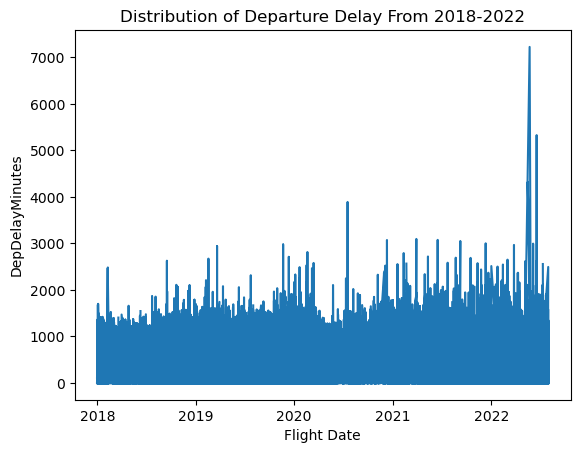

In [7]:
#Distribution of Departure Delay From 2018-2022
df=sdf.select("FlightDate","DepDelayMinutes").toPandas()
plt.plot(df['FlightDate'], df['DepDelayMinutes'])
plt.title("Distribution of Departure Delay From 2018-2022")
plt.xlabel("Flight Date")
plt.ylabel("DepDelayMinutes")
plt.show()

In [ ]:
df=sdf.select("FlightDate","ArrDelayMinutes").toPandas()
plt.plot(df['FlightDate'], df['ArrDelayMinutes'])
plt.title("Distribution of Arrival Delay From 2018-2022")
plt.xlabel("Flight Date")
plt.ylabel("ArrDelayMinutes")
plt.show()

             Airline  DepDelayMinutes
0  Endeavor Air Inc.             0.00
1  Endeavor Air Inc.             0.00
2  Endeavor Air Inc.             0.00
3  Endeavor Air Inc.             0.00
4  Endeavor Air Inc.             0.00
